In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt

In [2]:
plt.rcParams['figure.dpi'] = 100

## Preprocessing

In [3]:
# load the data
train = pd.read_csv("\\Adult_TrainDataset.csv")
test = pd.read_csv("\\Adult_TestDataset.csv")

In [4]:
train.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [5]:
test.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [6]:
X_train = train.iloc[:, 0:-1]
X_test = test.iloc[:, 0:-1]
y_train = train.iloc[:, -1]
y_test = test.iloc[:, -1]

In [7]:
from sklearn.preprocessing import LabelEncoder
import pickle

for column in X_train: 
    if X_train[column].dtype == np.object_:
        le = LabelEncoder()
        X_train[column] = le.fit_transform(X_train[column])
        X_test[column] = le.transform(X_test[column])
        output = open('Data\\'+
                      column+'_encoder', 'wb')
        pickle.dump(le, output)
        output.close()

In [8]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Default Parameters

## SVM

In [75]:
from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(X_train, y_train)

SVC()

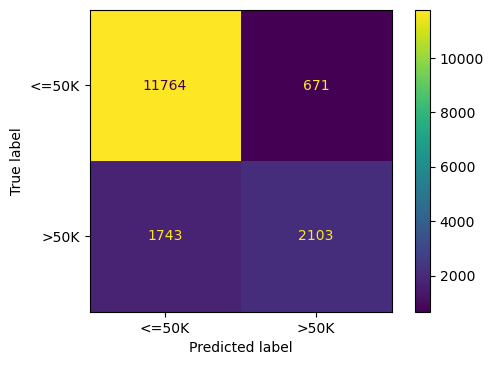

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91     12435
        >50K       0.76      0.55      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = svm_clf.predict(X_test)

# creating and plotting the confusion matrix
svm_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(svm_confusion_matrix, display_labels=['<=50K', '>50K'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

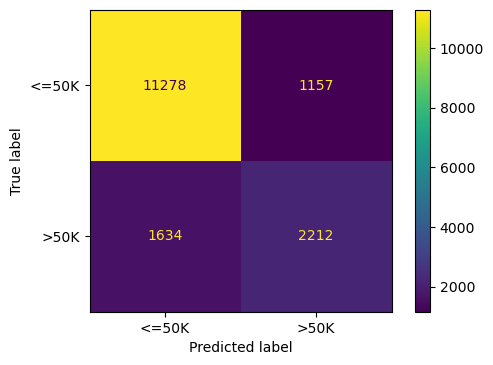

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89     12435
        >50K       0.66      0.58      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281



In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knn_clf.predict(X_test)

# creating and plotting the confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(knn_confusion_matrix, display_labels=['<=50K', '>50K'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

naive_clf = GaussianNB()

naive_clf.fit(X_train, y_train)

GaussianNB()

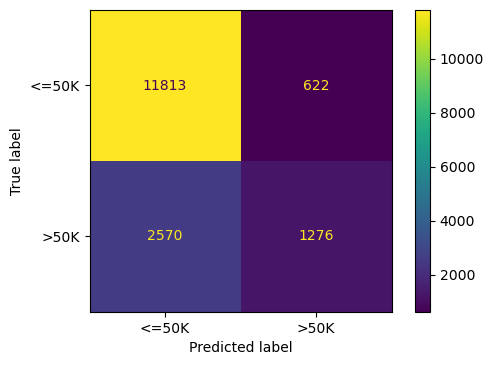

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88     12435
        >50K       0.67      0.33      0.44      3846

    accuracy                           0.80     16281
   macro avg       0.75      0.64      0.66     16281
weighted avg       0.79      0.80      0.78     16281



In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = naive_clf.predict(X_test)

# creating and plotting the confusion matrix
naive_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(naive_confusion_matrix, display_labels=['<=50K', '>50K'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# Hyperparameter Tuning

## SVM

In [16]:
from sklearn.metrics import accuracy_score
param_grid = { 
    # Regularization parameter.
    "C": np.logspace(-1, 1, 3),
    # Kernel type
    "kernel": ['rbf', 'poly', 'sigmoid'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": ['scale', 'auto']
    }
results = {
    'C': [],
    'kernel': [],
    'gamma': [],
    'accuracy': []
    }
i = 0
for cReg in param_grid['C']:
    for kernel in param_grid['kernel']:
        for gamma in param_grid['gamma']:
            
            svm_clf = SVC(C=cReg, kernel=kernel, gamma=gamma)

            svm_clf.fit(X_train, y_train)
            
            y_pred = svm_clf.predict(X_test)
            
            results['C'].append(cReg)
            results['kernel'].append(kernel)
            results['gamma'].append(gamma)
            results['accuracy'].append(accuracy_score(y_test, y_pred))
            
            i += 1
            print(i)           

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [17]:
max_index = results['accuracy'].index(max(results['accuracy']))
best_C = results['C'][max_index]
best_kernel = results['kernel'][max_index]
best_gamma = results['gamma'][max_index]

In [18]:
from sklearn.svm import SVC

svm_clf = SVC(C=best_C,
              kernel=best_kernel,
              gamma=best_gamma)

svm_clf.fit(X_train, y_train)

SVC()

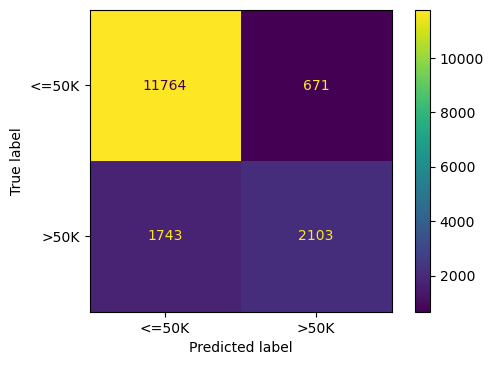

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91     12435
        >50K       0.76      0.55      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = svm_clf.predict(X_test)

# creating and plotting the confusion matrix
svm_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(svm_confusion_matrix, display_labels=['<=50K', '>50K'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

## KNN

In [20]:
from sklearn.metrics import accuracy_score
param_grid = { 
    'leaf_size' : [1]+list(range(10,51, 10)),
    'n_neighbors' : [1]+list(range(10,31, 10)),
    'p' : [1,2]
    }
results = {
    'leaf_size': [],
    'n_neighbors': [],
    'p': [],
    'accuracy': []
    }
i = 0
for leafSize in param_grid['leaf_size']:
    for n in param_grid['n_neighbors']:
        for p in param_grid['p']:
            
            knn_clf = KNeighborsClassifier(n_neighbors=n, leaf_size=leafSize, p=p)

            knn_clf.fit(X_train, y_train)
            
            y_pred = knn_clf.predict(X_test)
            
            results['leaf_size'].append(leafSize)
            results['n_neighbors'].append(n)
            results['p'].append(p)
            results['accuracy'].append(accuracy_score(y_test, y_pred))
            
            i += 1
            print(i)           

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [21]:
max_index = results['accuracy'].index(max(results['accuracy']))
best_leaf = results['leaf_size'][max_index]
best_n = results['n_neighbors'][max_index]
best_p = results['p'][max_index]

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=best_n,
                               leaf_size=best_leaf,
                               p=best_p)

knn_clf.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=20, p=1)

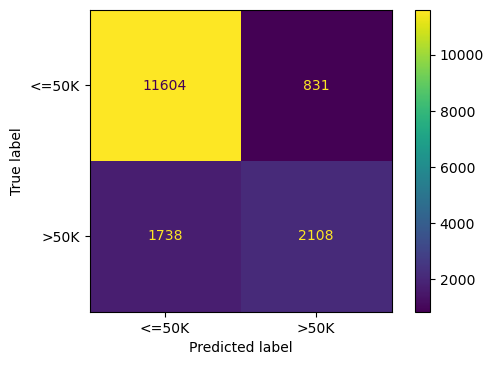

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     12435
        >50K       0.72      0.55      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knn_clf.predict(X_test)

# creating and plotting the confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(knn_confusion_matrix, display_labels=['<=50K', '>50K'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

In [24]:
from sklearn.metrics import accuracy_score
param_grid = { 
    'n_neighbors' : list(range(1,41, 1))
    }
results = {
    'n_neighbors': [],
    'train_accuracy': [],
    'test_accuracy' : []
    }

for n in param_grid['n_neighbors']:

    knn_clf = KNeighborsClassifier(n_neighbors=n)

    knn_clf.fit(X_train, y_train)

    y_pred_test = knn_clf.predict(X_test)
    
    y_pred_train = knn_clf.predict(X_train)

    results['n_neighbors'].append(n)
    
    results['test_accuracy'].append(accuracy_score(y_test, y_pred_test))
    
    results['train_accuracy'].append(accuracy_score(y_train, y_pred_train)) 

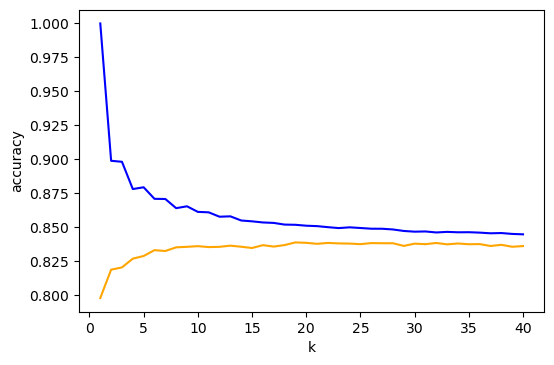

In [25]:
plt.xlabel('k')
plt.ylabel('accuracy')

plt.plot(results['n_neighbors'],
         results['train_accuracy'],
         color='b')

plt.plot(results['n_neighbors'],
         results['test_accuracy'],
         color='orange')

## Naive Bayes

In [26]:
from sklearn.metrics import accuracy_score
param_grid = { 
    'var_smoothing': np.logspace(0,-9, num=100)
    }
results = {
    'var_smoothing': [],
    'accuracy' : []
    }

for var in param_grid['var_smoothing']:

    naive_clf = GaussianNB(var_smoothing=var)

    naive_clf.fit(X_train, y_train)

    y_pred = naive_clf.predict(X_test)

    results['var_smoothing'].append(var)
    
    results['accuracy'].append(accuracy_score(y_test, y_pred))

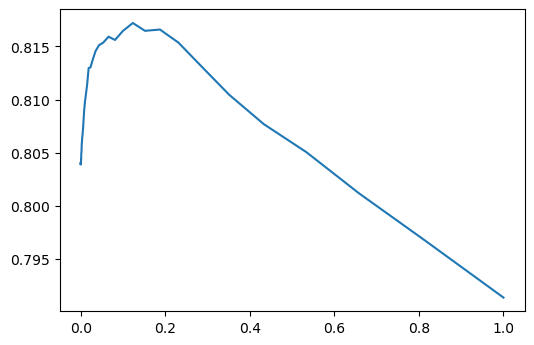

In [27]:
plt.plot(results['var_smoothing'],
         results['accuracy'])

In [28]:
max_index = results['accuracy'].index(max(results['accuracy']))
best_var = results['var_smoothing'][max_index]

In [29]:
naive_clf = GaussianNB(var_smoothing=best_var)

naive_clf.fit(X_train, y_train)

GaussianNB(var_smoothing=0.12328467394420659)

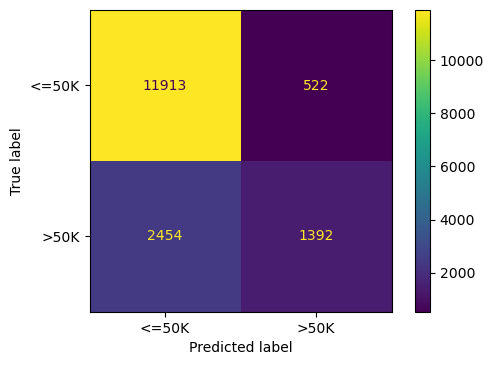

              precision    recall  f1-score   support

       <=50K       0.83      0.96      0.89     12435
        >50K       0.73      0.36      0.48      3846

    accuracy                           0.82     16281
   macro avg       0.78      0.66      0.69     16281
weighted avg       0.81      0.82      0.79     16281



In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = naive_clf.predict(X_test)

# creating and plotting the confusion matrix
naive_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(naive_confusion_matrix, display_labels=['<=50K', '>50K'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# Visualization

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

## SVM

In [92]:
from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(X_pca_train, y_train)

SVC()

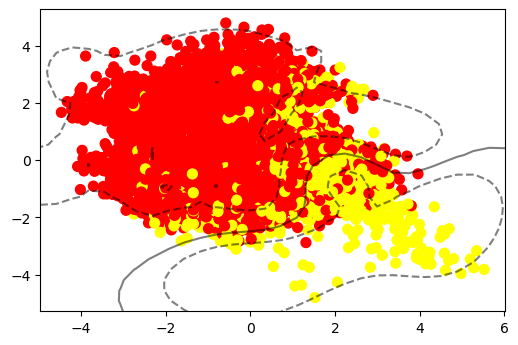

In [93]:
ax = plt.gca()
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_test, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# ax.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=50,
#            linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_pca_train, y_train)

KNeighborsClassifier()

In [98]:
import plotly.graph_objects as go
import plotly.express as px

y_score = knn_clf.predict_proba(X_pca_test)[:, 1]

fig = px.scatter(
    X_pca_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [99]:
from sklearn.metrics import accuracy_score
param_grid = { 
    'leaf_size' : [1]+list(range(10,51, 10)),
    'n_neighbors' : [1]+list(range(10,31, 10)),
    'p' : [1,2]
    }
results = {
    'leaf_size': [],
    'n_neighbors': [],
    'p': [],
    'accuracy': []
    }
i = 0
for leafSize in param_grid['leaf_size']:
    for n in param_grid['n_neighbors']:
        for p in param_grid['p']:
            
            knn_clf = KNeighborsClassifier(n_neighbors=n, leaf_size=leafSize, p=p)

            knn_clf.fit(X_pca_train, y_train)
            
            y_pred = knn_clf.predict(X_pca_test)
            
            results['leaf_size'].append(leafSize)
            results['n_neighbors'].append(n)
            results['p'].append(p)
            results['accuracy'].append(accuracy_score(y_test, y_pred))
            
            i += 1
            print(i)    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [100]:
max_index = results['accuracy'].index(max(results['accuracy']))
best_leaf = results['leaf_size'][max_index]
best_n = results['n_neighbors'][max_index]
best_p = results['p'][max_index]

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=best_n,
                               leaf_size=best_leaf,
                               p=best_p)

knn_clf.fit(X_pca_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=30, p=1)

In [102]:
import plotly.graph_objects as go
import plotly.express as px

y_score = knn_clf.predict_proba(X_pca_test)[:, 1]

fig = px.scatter(
    X_pca_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

# Ensemble

In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

svm_clf = SVC(C=best_C,
              kernel=best_kernel,
              gamma=best_gamma)


knn_clf = KNeighborsClassifier(n_neighbors=best_n,
                               leaf_size=best_leaf,
                               p=best_p)

naive_clf = GaussianNB(var_smoothing=best_var)

ensemble_clf = VotingClassifier(estimators=[('svc', svm_clf), ('knn', knn_clf), ('gnb', naive_clf)],
                 voting='hard')
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC()),
                             ('knn',
                              KNeighborsClassifier(leaf_size=1, n_neighbors=20,
                                                   p=1)),
                             ('gnb',
                              GaussianNB(var_smoothing=0.12328467394420659))])

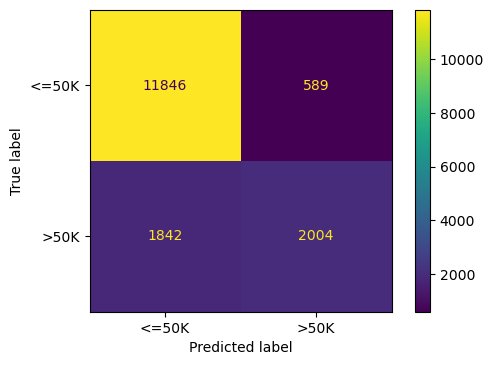

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91     12435
        >50K       0.77      0.52      0.62      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.74      0.76     16281
weighted avg       0.84      0.85      0.84     16281



In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = ensemble_clf.predict(X_test)

# creating and plotting the confusion matrix
ensemble_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(ensemble_confusion_matrix, display_labels=['<=50K', '>50K'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))